In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Abstract
The purpose of this study is to investigate 1D unconstrained optimization using three methods. We are provided with a function and then use golden-search, parabolic interpolation and Newton's method to find a value that maximizes the given function. All of the methods are able to find the value of $x\approx2.32635$ which maximizes the function. After comparing performance of these three methods, parabolic interpolation was the worst since it has limited precision. And since Newton-Raphson converges much faster than golden section method, it is the best out of three for this problem.

#Introduction

Optimization is the process of finding maximum or minimum given certain constraints. For example, if we need to find a shape that uses the least amount of material yet maximizes the volume contained, we need to use optimization. This process has a lot of other useful applications in science and engineering, therefore it is useful to develop computational optimization techniques.

In this assignment one of the simplest, yet instructive cases is studied: optimization in 1 dimension without constraints. 

The function in question is $4x-1.8x^2+1.2x^3-0.3x^4$

We need to use three methods to find its maximum:


* Golden search
* Parabolic interpolation
* Newton-Raphson

Then to compare computational efficiency of each of thos methods, errors are graphed versus iteration numbers and those graphs are compared

#Methodology
1)Golden-section method is an bracketing method, meaning it is reliable but slow. It is similar to bracketing methods for root finding. Every iteration the search interval is decreased by golden ratio. 





In [3]:
def golden(f,a,b,tol):
  e=[]
  r=(np.sqrt(5)-1)/2
  xl=a
  xu=b
  d0=xu-xl 
  d=r*d0
  x1=xl+d
  x2=xu-d
  f1=f(x1)
  f2=f(x2)
  ea=tol+1
  while(ea>tol):
    d=r*d
    if f1>f2:
      xl=x2
      x2=x1
      x1=xl+d
      f2=f1
      f1=f(x1)
    else:
      xu=x1
      x1=x2
      x2=xu-d
      f1=f2
      f2=f(x2)
    if f1>f2:
      xmax=x1
    if f2>f1:
      xmax=x2
    ea=abs((1-r)*(xu-xl)/xmax)*100
    e.append(ea)
  return xmax,e

2)Parabolic interpolation is an open method, which is faster than open methods, but sometimes it may not converge. It requires three initial points and approximates the function as a parabola, to which the maximum is always known. Then each new iteration replaces one of the points with maximum from previous iteration.

In [4]:
def parabolic(f,a,b,c,tol,imax):
  x3=np.zeros(imax+1)
  x0=a
  x1=b
  x2=c
  x3[0]=x1
  e=[]
  e.append(100)
  for i in range(1,imax+1):
    xt0=x0
    xt1=x1
    xt2=x2
    num=f(x0)*(x1**2-x2**2)+f(x1)*(x2**2-x0**2)+f(x2)*(x0**2-x1**2)
    denom=2*f(x0)*(x1-x2)+2*f(x1)*(x2-x0)+2*f(x2)*(x0-x1)
    if abs(denom)<10**(-16):
      i=i-1
      break
    x=num/denom
    x3[i]=x
    x0=xt1
    x1=xt2
    x2=x
    ea=abs((x3[i]-x3[i-1])/x3[i])*100
    e.append(ea)
    if ea<tol:
      break
  return x3[i],e

3)Newton-Raphson method here is the same as in root-finding methods. But insteat of function and it's first derivative we take first two derivatives of the function

In [5]:
def df(x):
  return 4-3.6*x+3.6*x**2-1.2*x**3

def ddf(x):
  return -3.6+7.2*x-3.6*x**2

def nr(f,df,x0,tol,imax):
  rootFound=False
  error=[]
  for i in range(imax):
    xr=x0-f(x0)/df(x0)
    e=abs((xr-x0)/xr)*100
    error.append(e)
    if e<tol:
      rootFound=True
      break
    x0=xr
  if rootFound is False:
    print("The root cannot be find with given accuracy within maximum number of iterations")
  return x0,error

Results

Part (a)

The function is initialized and graphed. Judging from the graph its maximum should be somewhere at $x\approx 2.3$

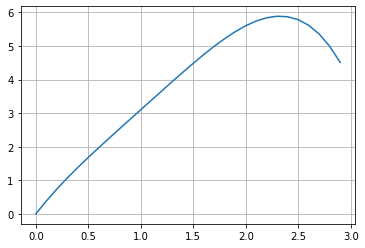

In [6]:
def f(x):
  return 4*x-1.8*x**2+1.2*x**3-0.3*x**4
x=np.arange(0,3,0.1)
plt.grid()
plt.plot(x,f(x))

Part (b)
For golden section method the value of $x_{max}=2.3263523921527267$

In [8]:
x_gold,e_gold=golden(f,-2,4,0.0000000000000001)

In [9]:
print(x_gold)

2.3263523921527267


Part (c) For parabolic method $x_{max}=2.326350914912123$

In [10]:
x_par,e_par=parabolic(f,1.75,2,2.5,0.0000000000000001,328)

In [11]:
print(x_par)

2.326350914912123


Part (d) For Newton-Raphson method $x_{max}=2.3263524026321307$

In [12]:
x_nr,e_nr=nr(df,ddf,3,2*10**(-14),100)

In [13]:
print(x_nr)

2.3263524026321307


Part (e)

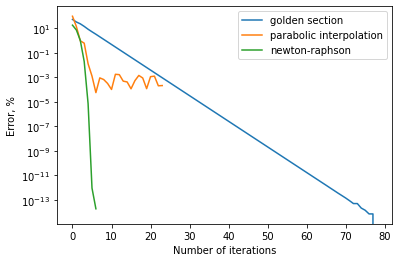

In [14]:
plt.plot(e_gold,label='golden section')
plt.plot(e_par,label='parabolic interpolation')
plt.plot(e_nr,label='newton-raphson')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Error, %')
plt.yscale('log')

In [15]:
print(min(e_par))

5.822480352405045e-05


Part (f)

Maximum precision for golden-section method is $10^{-16}$, the error converger linearly

Maximum precision for parabolic interpolation is $10^{-7}$

Maximum precision for Newton-Raphson method is $10^{-16}$, it converges quadratically

Therefore, Newton-Raphson method is the best for this problem since it converges fast and reaches maximum precision.

Parabolic interpolation is the worst method, since it has limited precision

#Conclusion
After performing optimization using 3 different techniques and comparing their result, for this particular setup golden-section method was the slowest but in the end achieved maximum precision. Parabolic interpolation had limited precision of $10^{-7}$ because at some point it had denomenator in $x$ which was zero(i.e. less than $10^{-16}$). And Newton-Raphson method was able to achieve maximum precision and was also the fastest. 

However, Newton-Raphson only worked because we were able to easily analytically obtain first and second order derivates of the function. It is not always the case, so if the derivatives are not well defined or hard to calculate, than the performance of Newton-Raphson will struggle. 

Also, it is possible that with the better choice of initial points or with other polynomials parabolic interpolation will perform better

Therefore more tests should be done on different functions and intial conditions to fully compare the efficiency of those optimization methods.
#References
Chapra, S. C., & Canale, R. P. (2011). Numerical methods for engineers
https://www.youtube.com/watch?v=dAUiJE_DgEI
https://www.youtube.com/watch?v=z5EcwQkSTo4